1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
from scipy.stats import norm
from scipy import random, linalg
from random import randrange
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import pandas as pd
from scipy.stats import linregress
import seaborn as sns
from scipy import linalg as la

In [72]:
x1 = np.random.normal(0, 1, size = 1000)
x2 = [x1[i] + np.random.normal(0, 3, size = 1000)[i] for i in range(len(x1))]
x3 = [2*x1[i] + x2[i] for i in range(len(x1))]
#dafr = {"x1" : x1, "x2" : x2, "x3" : x3}
#df = pd.DataFrame(dafr)
#print(df)
#data = np.column_stack((x1, x2, x3))
data = np.array((x1,x2,x3))
data.shape
print(data)

[[-0.55836508 -1.09756751 -0.05187627 ... -0.52703425  1.064943
   0.11526616]
 [ 2.96506363 -0.27331049 -3.2801817  ... -7.3358651   4.8121567
   2.78330764]
 [ 1.84833348 -2.46844551 -3.38393424 ... -8.3899336   6.9420427
   3.01383997]]


In [73]:
#covariance matrix
cm = np.cov(data)#, rowvar = False
#eigenvectors and eigenvalues
l, V = la.eig(cm)
l = np.sort(l)[::-1]
print("V:", "\n", V, "\n", "l:", "\n", l)
print(np.real_if_close(l))

V: 
 [[-0.11170977 -0.81649658  0.56643999]
 [-0.5820347  -0.40824829 -0.70325596]
 [-0.80545424  0.40824829  0.42962402]] 
 l: 
 [2.48519518e+01+0.j 2.17879828e+00+0.j 4.95758276e-16+0.j]
[2.48519518e+01 2.17879828e+00 4.95758276e-16]


In [74]:
U, spectrum, Vt = la.svd(cm)
#n = 1000

#print("shapes:", U.shape,  spectrum.shape, Vt.shape)
print ("Spectrum:", '\n', spectrum,'\n')
print ("U:", '\n', U,'\n')
print ("Vt:", '\n', Vt,'\n')

Spectrum: 
 [2.48519518e+01 2.17879828e+00 7.00425185e-16] 

U: 
 [[-0.11170977  0.56643999 -0.81649658]
 [-0.5820347  -0.70325596 -0.40824829]
 [-0.80545424  0.42962402  0.40824829]] 

Vt: 
 [[-0.11170977 -0.5820347  -0.80545424]
 [ 0.56643999 -0.70325596  0.42962402]
 [ 0.81649658  0.40824829 -0.40824829]] 



In [5]:
# the smallest eigenvalue (which is close to zero) comes out different between the two methods, this is likely due to a
# rounding error. Nevertheless, the important thing is that it is close to zero in both cases. 

In [75]:
Lambda = np.diag(l)
print (Lambda)
print ("Cm.trace():", cm.trace())
print ("Lambda.trace():", Lambda.trace())
perc = Lambda[0,0]/(Lambda.trace())
perc2 = (Lambda[0,0]+Lambda[1,1])/(Lambda.trace())
print("The percent of the total dataset's variability explained by the principal components is {:.5} %".format(
    np.real_if_close(perc)*100))
#if size = 3 the percentage retained is 99.993 %
print("Reducing the dimensionality to the first two eigenvectors, the percent of the total dataset's",
      "variability explained by \n the principal components is {} %".format(
    np.real_if_close(perc2)*100))
print("It makes sense to see that most of the information is in one eigenvalue since x2 and x3 are defined"
     "through x1, so the \n information is mainly contained in one variable.")

[[2.48519518e+01+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 2.17879828e+00+0.j 0.00000000e+00+0.j]
 [0.00000000e+00+0.j 0.00000000e+00+0.j 4.95758276e-16+0.j]]
Cm.trace(): 27.03075004649908
Lambda.trace(): (27.030750046499087+0j)
The percent of the total dataset's variability explained by the principal components is 91.94 %
Reducing the dimensionality to the first two eigenvectors, the percent of the total dataset's variability explained by 
 the principal components is 99.99999999999999 %
It makes sense to see that most of the information is in one eigenvalue since x2 and x3 are definedthrough x1, so the 
 information is mainly contained in one variable.


In [76]:
un = V.dot(V.T)
print(un)

[[ 1.00000000e+00 -2.27786750e-16  1.39347601e-16]
 [-2.27786750e-16  1.00000000e+00  4.10710046e-16]
 [ 1.39347601e-16  4.10710046e-16  1.00000000e+00]]


In [77]:
# made it with the covariance formula for a dataset with 0 mean, just to check if it works, since our dataset does have mean 
# zero
l0, V0 = np.linalg.eig(np.dot(data, data.T)/(1000-1))
# rotate all the data points accordingly to the new base
datap = np.dot(V0.T, data)

(24.85195176173606+0j) [-0.11170977 -0.5820347  -0.80545424]
(2.178798284763027+0j) [-0.81649658 -0.40824829  0.40824829]
(4.957582764495433e-16+0j) [ 0.56643999 -0.70325596  0.42962402]
(24.85195176173606+0j) [-0.11170977 -0.5820347  -0.80545424]
(2.178798284763027+0j) [-0.81649658 -0.40824829  0.40824829]
(4.957582764495433e-16+0j) [ 0.56643999 -0.70325596  0.42962402]
(24.85195176173606+0j) [-0.11170977 -0.5820347  -0.80545424]
(2.178798284763027+0j) [-0.81649658 -0.40824829  0.40824829]
(4.957582764495433e-16+0j) [ 0.56643999 -0.70325596  0.42962402]
(24.85195176173606+0j) [1 0 0]
(2.178798284763027+0j) [0 1 0]
(4.957582764495433e-16+0j) [0 0 1]
(24.85195176173606+0j) [1 0 0]
(2.178798284763027+0j) [0 1 0]
(4.957582764495433e-16+0j) [0 0 1]
(24.85195176173606+0j) [1 0 0]
(2.178798284763027+0j) [0 1 0]
(4.957582764495433e-16+0j) [0 0 1]


Text(0.5, 1.0, '$x_2$ vs $x_3$ scaled by eigenvalue. (Rotated)')

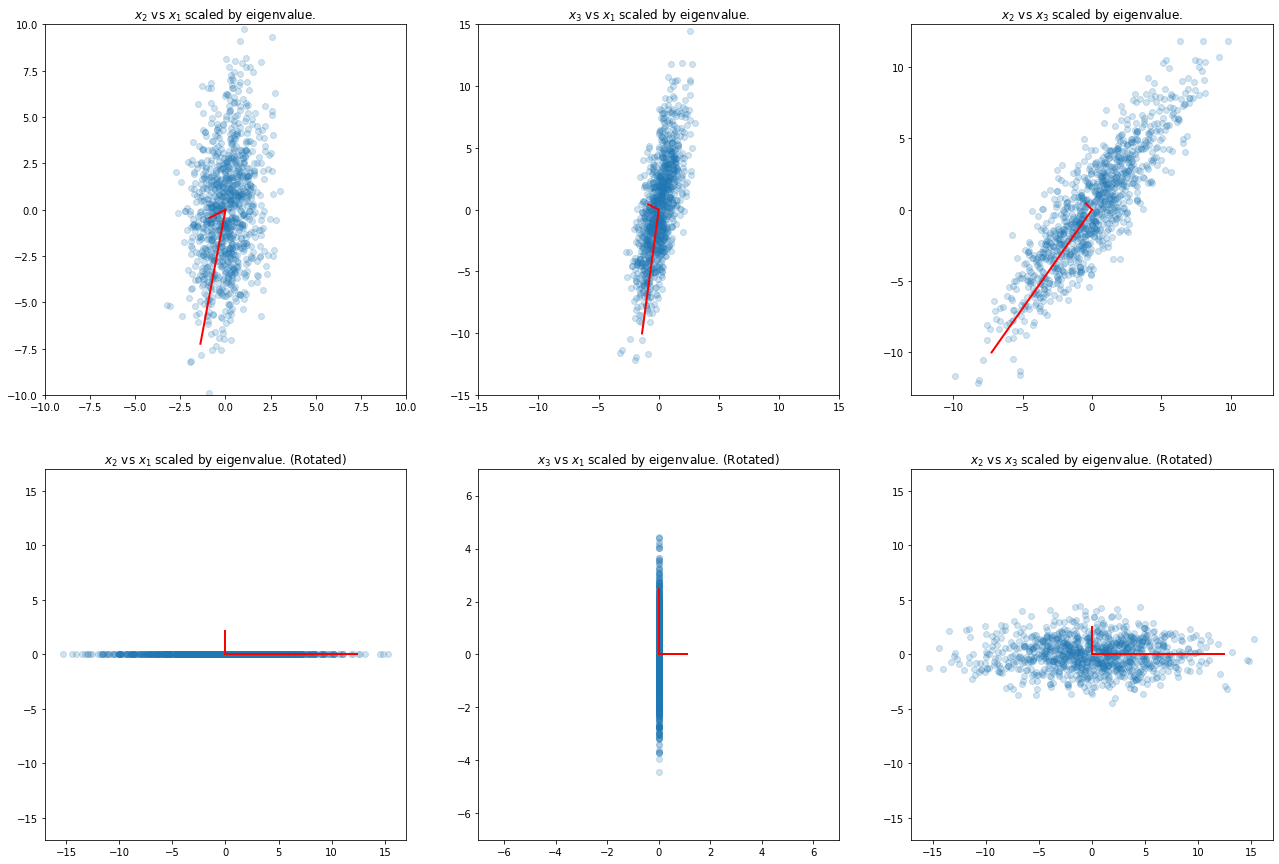

In [82]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(22, 15))

scale_factor = 0.5

ax1.scatter(data[0,:], data[1,:], alpha=0.2)
# draw each eigenvector
for li, vi in zip(l, V.T):
    print (li, vi)
    # the line is defined by means of its beginning and its end 
    ax1.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
ax1.axis([-10,10,-10,10])
ax1.set_title('$x_2$ vs $x_1$ scaled by eigenvalue.')

ax2.scatter(data[0,:], data[2,:], alpha=0.2)
# draw each eigenvector
for li, vi in zip(l, V.T):
    print (li, vi)
    # the line is defined by means of its beginning and its end 
    ax2.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)    
ax2.axis([-15,15,-15,15])
ax2.set_title('$x_3$ vs $x_1$ scaled by eigenvalue.')

ax3.scatter(data[1,:], data[2,:], alpha=0.2)
# draw each eigenvector
for li, vi in zip(l, V.T):
    print (li, vi)
    # the line is defined by means of its beginning and its end 
    ax3.plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)    
ax3.axis([-13,13,-13,13])
ax3.set_title('$x_2$ vs $x_3$ scaled by eigenvalue.')

# plot the rotated dataset and its "axes"

ax4.scatter(datap[0,:], datap[1,:], alpha=0.2)
#same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l, np.diag([1]*3)):
    print (li, vi)
    ax4.plot([0, scale_factor*li*vi[0]], [0, li*vi[1]], 'r-', lw=2)
ax4.axis([-17,17,-17,17])
ax4.set_title('$x_2$ vs $x_1$ scaled by eigenvalue. (Rotated)')

ax5.scatter(datap[1,:], datap[2,:], alpha=0.2)
#same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l, np.diag([1]*3)):
    print (li, vi)
    ax5.plot([0, scale_factor*li*vi[1]], [0, 0.5*10**16*li*vi[2]], 'r-', lw=2)
ax5.axis([-7,7,-7,7])
ax5.set_title('$x_3$ vs $x_1$ scaled by eigenvalue. (Rotated)')

ax6.scatter(datap[0,:], datap[2,:], alpha=0.2)
#same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l, np.diag([1]*3)):
    print (li, vi)
    ax6.plot([0, scale_factor*li*vi[0]], [0, 0.5*10**16*li*vi[2]], 'r-', lw=2)
ax6.axis([-17,17,-17,17])
ax6.set_title('$x_2$ vs $x_3$ scaled by eigenvalue. (Rotated)')

In [14]:
# By looking at the rotated plots one observes that in the first two wa basically have a line along the axis, this makes 
# sense remembering that the information lies almost completely in one variable so in the rotated basis the projection
# in the x2/x1 and x3/x1 plane is flat.

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [16]:
no = [np.random.normal(0, 1/50, size = 1000) for i in range(13)]
noi = []
for i in range(13): 
    if i < 3:
        noi.append(data[i])
    else:
        noi.append(no[i])
    noise = np.array(noi)
noise.shape

(13, 1000)

In [18]:
#covariance matrix
cmn = np.cov(noise)
#eigenvectors and eigenvalues
ln, Vn = la.eig(cmn)
ln = np.sort(ln)[::-1]
print("Vn:", Vn, "\n", "ln:", ln)
print(np.real_if_close(ln))

Vn: [[-1.16388917e-01 -5.65496361e-01  8.16496581e-01  1.83927872e-04
   3.78099302e-04 -7.70098319e-05 -7.87637914e-06  4.30484043e-04
   2.93623770e-05 -3.00830515e-04 -1.72010922e-04  5.73614970e-04
  -2.14235735e-05]
 [-5.76200683e-01  7.08042861e-01  4.08248290e-01 -3.13437768e-04
  -6.05184103e-04  2.62108057e-04 -1.34050444e-05 -4.98804072e-04
   6.99827859e-05  4.02096587e-04  2.56220409e-04 -6.29830221e-04
  -3.08967454e-05]
 [-8.08978517e-01 -4.22949861e-01 -4.08248290e-01  5.44179752e-05
   1.51014502e-04  1.08088394e-04 -2.91578027e-05  3.62164014e-04
   1.28707540e-04 -1.99564444e-04 -8.78014349e-05  5.17399719e-04
  -7.37438924e-05]
 [-1.50243774e-04 -1.75862368e-05 -1.06017609e-15 -1.02501456e-01
   8.17443256e-01  5.07247035e-02 -1.30946436e-02 -1.15237256e-01
  -6.85134994e-02  1.83703017e-01  2.19669964e-02 -3.67747739e-01
  -3.62069075e-01]
 [ 1.10491994e-04  4.83245711e-05  1.19893597e-15 -5.28066371e-01
  -2.89444415e-02  3.92756676e-02 -2.76914163e-01 -1.39573717e

In [70]:
Lambdan = np.diag(ln)
print ("cov.trace():", cmn.trace())
print ("Lambdan.trace():", Lambdan.trace())
percn = Lambdan[0,0]/Lambdan.trace()
percn99 = (Lambdan[0,0]+Lambdan[1,1])/Lambdan.trace()
print("The percent of the total dataset's variability explained by the principal components is {:.5} %".format(
    np.real_if_close(percn)*100))
print("Reducing the dimensionality to the first two eigenvectors, the percent of the total dataset's",
      "variability explained by \n the principal components is {:.5} %".format(
    np.real_if_close(percn99)*100))
print("What we observe is that since the noise has mean zero and std significantly smaller than the signal, it doesn't"
     "change that much the amount of information the first eigenvalue/first two eigenvalue are capable to give. Still, as can", 
     "be seen, the percentage lowers a little compared to the ideal case.")

cov.trace(): 27.971052086333472
Lambdan.trace(): (27.97105208633347+0j)
The percent of the total dataset's variability explained by the principal components is 92.896 %
Reducing the dimensionality to the first two eigenvectors, the percent of the total dataset's variability explained by 
 the principal components is 99.986 %
What we observe is that since the noise has mean zero and std significantly smaller than the signal, it doesn'tchange that much the amount of information the first eigenvalue/first two eigenvalue are capable to give. Still, as can be seen, the percentage lowers a little compared to the ideal case.


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [37]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 

In [62]:
df = pd.read_csv('/mnt/c/Users/ASUS/data/magic04.data',nrows=1000)
df.columns=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','category']
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,category
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g
...,...,...,...,...,...,...,...,...,...,...,...
995,13.3396,10.5628,2.1917,0.7910,0.4019,-14.8910,-2.3901,11.9001,10.7959,182.910,g
996,49.8521,11.4525,2.3971,0.4529,0.2305,52.6071,39.3622,-8.6905,6.0457,183.495,g
997,29.2688,14.2779,2.5723,0.4016,0.2021,-21.2132,-23.9344,-8.2073,47.5590,102.779,g
998,21.9470,20.3281,2.4864,0.4078,0.2072,12.8338,10.4007,14.8348,40.4341,137.810,g


In [63]:
df = df.drop(columns = ['category'], axis = 1)

In [65]:
covm = np.cov(df.T)
lm, Vm = la.eig(covm)
lm = np.sort(lm)[::-1]
lm = np.real_if_close(lm)

In [67]:
Lambdam = np.diag(lm)
percm = Lambdam[0][0]/Lambdam.trace()
print("The percent of the total dataset's variability explained by the principal components is {:.5} %".format(
    np.real_if_close(percm)*100))

The percent of the total dataset's variability explained by the principal components is 60.797 %


In [69]:
v = .99 #deciding the percentage I want to be retained of the dataset's variability
upd = percm
i = 1 
while upd < v:
    upd += Lambdam[i][i]/Lambdam.trace()
    i += 1
print("So that {:.5}% of the total dataset's variability is explained, the first {} eigenvalues are needed.".format(upd*100,i))

So that 99.587% of the total dataset's variability is explained, the first 6 eigenvalues are needed.
